In [32]:
import pandas as pd

pm10_df = pd.read_csv('pm10.csv', index_col=0)
pm25_df = pd.read_csv('pm25.csv', index_col=0)

In [33]:
pm10_df.head()

,Data,Tarnobrzeg,Sanok,Rzeszow_Rejtana,Rzeszow_Pilsudskiego,Rymanow_Zdroj,Przemysl,Nisko,Mielec,Krosno,Jaslo,Jaroslaw,Debica,Rzeszow_Starzynskiego,Rzeszow_Slocinska,Jedlicze
0,2022-12-22 01:00,37.3,23.6,19.9,26.6,14.2,21.5,29.9,26.9,12.7,20.8,26.5,19.2,NaN,NaN,NaN
1,2022-12-22 02:00,32.0,24.8,17.8,25.3,14.9,19.6,28.5,26.9,14.8,17.8,29.2,26.5,NaN,NaN,NaN
2,2022-12-22 03:00,29.4,21.1,20.1,26.0,14.3,14.9,24.3,22.2,37.4,15.9,15.5,18.1,NaN,NaN,NaN
3,2022-12-22 04:00,24.6,24.0,20.4,23.8,14.0,11.5,25.0,19.9,58.8,17.4,10.3,16.3,NaN,NaN,NaN
4,2022-12-22 05:00,24.0,20.0,24.2,21.6,14.5,9.9,21.6,19.3,45.3,22.6,10.2,15.7,NaN,NaN,NaN


In [34]:
cities = list(pm10_df.columns)[1:]

In [45]:
cities = [
    'Tarnobrzeg',
    'Sanok',
    'Rzeszow',
    'Rymanow',
    'Przemysl',
    'Nisko',
    'Mielec',
    'Krosno',
    'Jaslo',
    'Jaroslaw',
    'Debica',
    'Jedlicze'
 ]

In [46]:
import geopandas as gpd

# Replace 'path/to/your/file.shp' with the actual path to your Shapefile
shapefile_path = "zipfolder/Wszystkie.shp"

# Read the Shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Display the GeoDataFrame
print(gdf)

                      INFO       STATION_CO                 STATION_NA  \
0    automatyczno-manualny     PmKosTargowa   Kościerzyna, ul. Targowa   
1             automatyczny     PmMalMickiew   Malbork, ul. Mickiewicza   
2    automatyczno-manualny     PmLebMalczew  Lębork, ul. Malczewskiego   
3             automatyczny     PmLinieKosci       Liniewko Kościerskie   
4             automatyczny     KpBydPlPozna   Bydgoszcz, pl. Poznański   
..                     ...              ...                        ...   
282  automatyczno-manualny     WpPoznSzwajc     Poznań ul. Szwajcarska   
283           automatyczny     WpMosinaCzer    Mosina, ul. Czereśniowa   
284  automatyczno-manualny     OpBrzegPoprz      Brzeg, ul. Poprzeczna   
285  automatyczno-manualny     LuNowaSolKos                   Nowa Sól   
286  automatyczno-manualny  MpWadowiBalyMOB       Wadowice, ul. Bałysa   

                       ADDRESS                   geometry  
0     Kościerzyna, ul. Targowa  POINT (17.97586 54.

In [47]:
gdf['STATION_NA'].unique()

array(['Kościerzyna, ul. Targowa', 'Malbork, ul. Mickiewicza',
       'Lębork, ul. Malczewskiego', 'Liniewko Kościerskie',
       'Bydgoszcz, pl. Poznański', 'Bydgoszcz, ul. Warszawska',
       'Ciechocinek, ul. Tężniowa', 'Radomsko, ul. Rolna',
       'Grudziądz, ul. Sienkiewicza',
       'Koniczynka, Pojezierze Chełmińskie', 'Jarczew, IMGW',
       'Kraśnik, ul. Koszarowa', 'Lublin, ul. Śliwińskiego',
       'Lublin, ul. Obywatelska', 'Radzyń Podlaski, ul. Sitkowskiego',
       'Toruń, ul. Dziewulskiego', 'Toruń, ul. Przy Kaszowniku',
       'Włocławek, ul. Okrzei', 'Zielonka, Bory Tucholskie',
       'Biała Podlaska, ul. Orzechowa',
       'Oława, ul. Żołnierzy Armii Krajowej', 'Oleśnica, ul. Brzozowa',
       'Osieczów', 'Polkowice, ul. Kasztanowa', 'Śnieżka',
       'Szczawno-Zdrój, ul. Kolejowa', 'Gajew, Ujęcie Wody',
       'Łódź, ul. Czernika', 'Łódź, ul. Gdańska', 'Łódź, ul. Legionów',
       'Łódź, ul. Rudzka', 'Pabianice, ul. Konstantynowska',
       'Pabianice, ul. Kiliński

In [48]:
from unidecode import unidecode

# Apply unidecode to each string column
for col in gdf.select_dtypes(include=[object]):
    gdf[col] = gdf[col].apply(unidecode)

In [49]:
gdf['STATION_NA'].unique()

array(['Koscierzyna, ul. Targowa', 'Malbork, ul. Mickiewicza',
       'Lebork, ul. Malczewskiego', 'Liniewko Koscierskie',
       'Bydgoszcz, pl. Poznanski', 'Bydgoszcz, ul. Warszawska',
       'Ciechocinek, ul. Tezniowa', 'Radomsko, ul. Rolna',
       'Grudziadz, ul. Sienkiewicza',
       'Koniczynka, Pojezierze Chelminskie', 'Jarczew, IMGW',
       'Krasnik, ul. Koszarowa', 'Lublin, ul. Sliwinskiego',
       'Lublin, ul. Obywatelska', 'Radzyn Podlaski, ul. Sitkowskiego',
       'Torun, ul. Dziewulskiego', 'Torun, ul. Przy Kaszowniku',
       'Wloclawek, ul. Okrzei', 'Zielonka, Bory Tucholskie',
       'Biala Podlaska, ul. Orzechowa',
       'Olawa, ul. Zolnierzy Armii Krajowej', 'Olesnica, ul. Brzozowa',
       'Osieczow', 'Polkowice, ul. Kasztanowa', 'Sniezka',
       'Szczawno-Zdroj, ul. Kolejowa', 'Gajew, Ujecie Wody',
       'Lodz, ul. Czernika', 'Lodz, ul. Gdanska', 'Lodz, ul. Legionow',
       'Lodz, ul. Rudzka', 'Pabianice, ul. Konstantynowska',
       'Pabianice, ul. Kilinski

In [50]:
for city in cities:
    print(gdf[gdf['STATION_NA'].str.contains(city)]['STATION_NA'].unique())

['Tarnobrzeg, ul. Dabrowskiej']
['Sanok, ul. Sadowa']
['Rzeszow, ul. Rejtana' 'Rzeszow, ul. Pilsudskiego'
 'Rzeszow, ul. Starzynskiego' 'Rzeszow, ul. Slocinska']
['Rymanow Zdroj, ul. Parkowa']
['Szczecinek, ul. Przemyslowa' 'Przemysl, ul. Grunwaldzka']
['Nisko, ul. Szklarniowa']
['Mielec, ul. Biernackiego' 'Mielec, ul. Pogodna']
['Krosno, ul. Kletowki']
['Jaslo, ul. Sikorskiego']
['Jaroslaw, ul. Pruchnicka']
['Debica, ul.Grottgera']
['Jedlicze, ul. Tokarskich']


In [63]:
columns = [gdf[gdf['STATION_NA'].str.contains(city)]['STATION_NA'].unique() for city in cities] 

In [64]:
import itertools

columns = list(itertools.chain.from_iterable(columns))

In [65]:
columns = [column for column in columns if column != 'Szczecinek, ul. Przemyslowa']

In [66]:
columns

['Tarnobrzeg, ul. Dabrowskiej',
 'Sanok, ul. Sadowa',
 'Rzeszow, ul. Rejtana',
 'Rzeszow, ul. Pilsudskiego',
 'Rzeszow, ul. Starzynskiego',
 'Rzeszow, ul. Slocinska',
 'Rymanow Zdroj, ul. Parkowa',
 'Przemysl, ul. Grunwaldzka',
 'Nisko, ul. Szklarniowa',
 'Mielec, ul. Biernackiego',
 'Mielec, ul. Pogodna',
 'Krosno, ul. Kletowki',
 'Jaslo, ul. Sikorskiego',
 'Jaroslaw, ul. Pruchnicka',
 'Debica, ul.Grottgera',
 'Jedlicze, ul. Tokarskich']

In [70]:
gdf_podkarpacie = gdf.loc[gdf['STATION_NA'].isin(columns)]

In [71]:
gdf_podkarpacie

,INFO,STATION_CO,STATION_NA,ADDRESS,geometry
35,automatyczno-manualny,PkJasloSikor,"Jaslo, ul. Sikorskiego","Jaslo, Sikorskiego",POINT (21.45462 49.74489)
36,automatyczno-manualny,PkKrosKletow,"Krosno, ul. Kletowki","Krosno, Kletowki",POINT (21.74970 49.69017)
37,automatyczno-manualny,PkNiskoSzkla,"Nisko, ul. Szklarniowa","Nisko, Szklarniowa",POINT (22.11247 50.52989)
121,automatyczno-manualny,PkSanoSadowa,"Sanok, ul. Sadowa","Sanok, Sadowa",POINT (22.19589 49.57173)
122,automatyczno-manualny,PkTarnDabrow,"Tarnobrzeg, ul. Dabrowskiej","Tarnobrzeg, Marii Dabrowskiej",POINT (21.68837 50.57574)
136,automatyczno-manualny,PkJarosPruch,"Jaroslaw, ul. Pruchnicka","Jaroslaw, Pruchnicka",POINT (22.67477 50.01208)
170,automatyczno-manualny,PkPrzemGrunw,"Przemysl, ul. Grunwaldzka","Przemysl, Grunwaldzka",POINT (22.75624 49.78434)
171,automatyczno-manualny,PkRzeszRejta,"Rzeszow, ul. Rejtana","Rzeszow, Rejtana",POINT (22.01058 50.02424)
185,automatyczno-manualny,PkDebiGrottg,"Debica, ul.Grottgera","Debica, Grottgera 3",POINT (21.41626 50.05479)
188,automatyczny,PkMielBierna,"Mielec, ul. Biernackiego","Mielec, Biernackiego",POINT (21.44094 50.29913)


In [72]:
# Replace 'path/to/your/file.shp' with the actual path to your Shapefile
shapefile_path = "wojewodztwa/wojewodztwa.shp"

# Read the Shapefile into a GeoDataFrame
gdf_woj = gpd.read_file(shapefile_path)

# Display the GeoDataFrame
print(gdf_woj)

   gml_id JPT_SJR_KO JPT_POWIER JPT_KOD_JE           JPT_NAZWA_ JPT_ORGAN_  \
0    None        WOJ    2289315         32   zachodniopomorskie       None   
1    None        WOJ    1398751         08             lubuskie       None   
2    None        WOJ    1994777         02         dolnośląskie       None   
3    None        WOJ    2982700         30        wielkopolskie       None   
4    None        WOJ    1831001         22            pomorskie       None   
5    None        WOJ     941272         16             opolskie       None   
6    None        WOJ    1797058         04   kujawsko-pomorskie       None   
7    None        WOJ    1233406         24              śląskie       None   
8    None        WOJ    1821720         10              łódzkie       None   
9    None        WOJ    1518007         12          małopolskie       None   
10   None        WOJ    2417419         28  warmińsko-mazurskie       None   
11   None        WOJ    3555920         14          mazowieckie 

In [79]:
gdf_woj['JPT_NAZWA_'].unique()

array(['zachodniopomorskie', 'lubuskie', 'dolnośląskie', 'wielkopolskie',
       'pomorskie', 'opolskie', 'kujawsko-pomorskie', 'śląskie',
       'łódzkie', 'małopolskie', 'warmińsko-mazurskie', 'mazowieckie',
       'świętokrzyskie', 'podkarpackie', 'podlaskie', 'lubelskie'],
      dtype=object)

In [80]:
gdf_podkarpacie_woj = gdf_woj.loc[gdf_woj['JPT_NAZWA_'].isin(['podkarpackie'])]

In [82]:
gdf_podkarpacie_woj

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry
13,None,WOJ,1784523,18,podkarpackie,None,0,20221206,0,20120926,...,1366391,0,None,0,0,11.2224322272,2.23569279514,69058132400000,wojewodztwo,"POLYGON ((819920.700 271467.820, 819598.610 27..."


<Axes: >

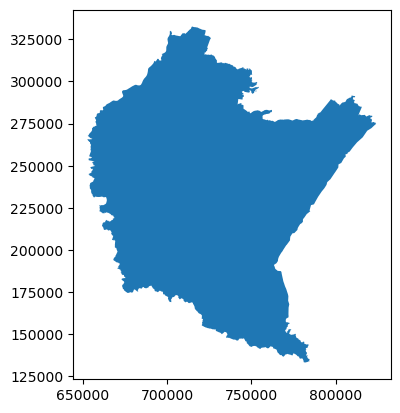

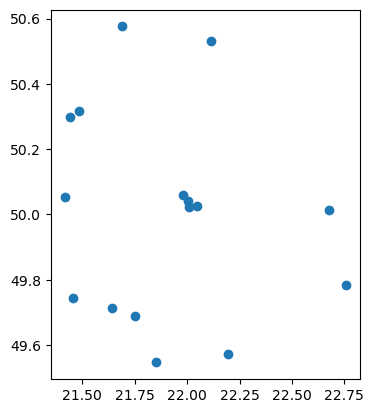

In [85]:
gdf_podkarpacie_woj.plot()
gdf_podkarpacie.plot()

In [87]:
pm10_df.isna().sum()

Data                       0
Tarnobrzeg                 0
Sanok                      0
Rzeszow_Rejtana            0
Rzeszow_Pilsudskiego       0
Rymanow_Zdroj              0
Przemysl                   0
Nisko                      0
Mielec                     0
Krosno                     0
Jaslo                      0
Jaroslaw                   0
Debica                    10
Rzeszow_Starzynskiego    768
Rzeszow_Slocinska        768
Jedlicze                 768
dtype: int64

In [93]:
pm10_df['Debica'].astype(float)

ValueError: could not convert string to float: ' '

In [97]:
import numpy as np

pm10_df['Debica'] = pm10_df['Debica'].replace(' ', np.nan)

In [98]:
pm10_df['Debica'] = pm10_df['Debica'].astype(float)

In [99]:
pm10_df['Debica'] = pm10_df['Debica'].fillna(pm10_df['Debica'].mean())

In [101]:
pm10_df = pm10_df.dropna(axis=1, how='any')

In [102]:
pm10_df.head()

,Data,Tarnobrzeg,Sanok,Rzeszow_Rejtana,Rzeszow_Pilsudskiego,Rymanow_Zdroj,Przemysl,Nisko,Mielec,Krosno,Jaslo,Jaroslaw,Debica
0,2022-12-22 01:00,37.3,23.6,19.9,26.6,14.2,21.5,29.9,26.9,12.7,20.8,26.5,19.2
1,2022-12-22 02:00,32.0,24.8,17.8,25.3,14.9,19.6,28.5,26.9,14.8,17.8,29.2,26.5
2,2022-12-22 03:00,29.4,21.1,20.1,26.0,14.3,14.9,24.3,22.2,37.4,15.9,15.5,18.1
3,2022-12-22 04:00,24.6,24.0,20.4,23.8,14.0,11.5,25.0,19.9,58.8,17.4,10.3,16.3
4,2022-12-22 05:00,24.0,20.0,24.2,21.6,14.5,9.9,21.6,19.3,45.3,22.6,10.2,15.7


In [103]:
pm10_df.shape

(2136, 13)

In [106]:
gdf_podkarpacie = gdf_podkarpacie.drop(['INFO', 'STATION_CO', 'ADDRESS'], axis=1)

In [113]:
addresses = gdf_podkarpacie['STATION_NA'].unique()

gdf_podkarpacie

In [114]:
cities = pm10_df.columns[1:]

In [129]:
gdf_podkarpacie_cities = gdf_podkarpacie.copy()

for address in addresses:
    matched_city = next((city for city in cities if city.split('_')[0] in address), None)
    if not matched_city or len(matched_city.split('_')) > 1:
        continue
    
    gdf_podkarpacie_cities.loc[gdf_podkarpacie_cities['STATION_NA'] == address, 'STATION_NA'] = matched_city

gdf_podkarpacie_cities

,STATION_NA,geometry
35,Jaslo,POINT (21.45462 49.74489)
36,Krosno,POINT (21.74970 49.69017)
37,Nisko,POINT (22.11247 50.52989)
121,Sanok,POINT (22.19589 49.57173)
122,Tarnobrzeg,POINT (21.68837 50.57574)
136,Jaroslaw,POINT (22.67477 50.01208)
170,Przemysl,POINT (22.75624 49.78434)
171,"Rzeszow, ul. Rejtana",POINT (22.01058 50.02424)
185,Debica,POINT (21.41626 50.05479)
188,Mielec,POINT (21.44094 50.29913)


In [132]:
for address in addresses:
    matched_city = next((city for city in cities if city.split('_')[-1] in address), None)
    if not matched_city:
        continue
    
    gdf_podkarpacie_cities.loc[gdf_podkarpacie_cities['STATION_NA'] == address, 'STATION_NA'] = matched_city

gdf_podkarpacie_cities

,STATION_NA,geometry
35,Jaslo,POINT (21.45462 49.74489)
36,Krosno,POINT (21.74970 49.69017)
37,Nisko,POINT (22.11247 50.52989)
121,Sanok,POINT (22.19589 49.57173)
122,Tarnobrzeg,POINT (21.68837 50.57574)
136,Jaroslaw,POINT (22.67477 50.01208)
170,Przemysl,POINT (22.75624 49.78434)
171,Rzeszow_Rejtana,POINT (22.01058 50.02424)
185,Debica,POINT (21.41626 50.05479)
188,Mielec,POINT (21.44094 50.29913)


In [134]:
for city in gdf_podkarpacie_cities['STATION_NA']:
    if "," in city:
        gdf_podkarpacie_cities = gdf_podkarpacie_cities.drop(gdf_podkarpacie_cities[gdf_podkarpacie_cities['STATION_NA'] == city].index)

In [138]:
gdf_podkarpacie_cities = gdf_podkarpacie_cities.drop_duplicates(subset=['STATION_NA'])

In [139]:
gdf_podkarpacie_cities

,STATION_NA,geometry
35,Jaslo,POINT (21.45462 49.74489)
36,Krosno,POINT (21.74970 49.69017)
37,Nisko,POINT (22.11247 50.52989)
121,Sanok,POINT (22.19589 49.57173)
122,Tarnobrzeg,POINT (21.68837 50.57574)
136,Jaroslaw,POINT (22.67477 50.01208)
170,Przemysl,POINT (22.75624 49.78434)
171,Rzeszow_Rejtana,POINT (22.01058 50.02424)
185,Debica,POINT (21.41626 50.05479)
188,Mielec,POINT (21.44094 50.29913)


In [141]:
pm10_df = pm10_df.set_index('Data')

In [142]:
pm10_df

,Tarnobrzeg,Sanok,Rzeszow_Rejtana,Rzeszow_Pilsudskiego,Rymanow_Zdroj,Przemysl,Nisko,Mielec,Krosno,Jaslo,Jaroslaw,Debica
Data,,,,,,,,,,,,
2022-12-22 01:00,37.3,23.6,19.9,26.6,14.2,21.5,29.9,26.9,12.7,20.8,26.5,19.2
2022-12-22 02:00,32.0,24.8,17.8,25.3,14.9,19.6,28.5,26.9,14.8,17.8,29.2,26.5
2022-12-22 03:00,29.4,21.1,20.1,26.0,14.3,14.9,24.3,22.2,37.4,15.9,15.5,18.1
2022-12-22 04:00,24.6,24.0,20.4,23.8,14.0,11.5,25.0,19.9,58.8,17.4,10.3,16.3
2022-12-22 05:00,24.0,20.0,24.2,21.6,14.5,9.9,21.6,19.3,45.3,22.6,10.2,15.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20 20:00,57.6,34.2,57.8,73.3,80.6,56.9,45.8,55.2,65.8,88.2,74.1,35.6
2023-03-20 21:00,67.2,54.4,74.4,70.2,74.2,66.0,62.2,46.9,81.6,92.8,136.6,51.6
2023-03-20 22:00,58.4,57.7,67.0,64.6,71.8,68.9,37.5,39.3,101.2,86.3,98.7,46.7


/home/student/.conda/envs/proc-stoc/lib/python3.11/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


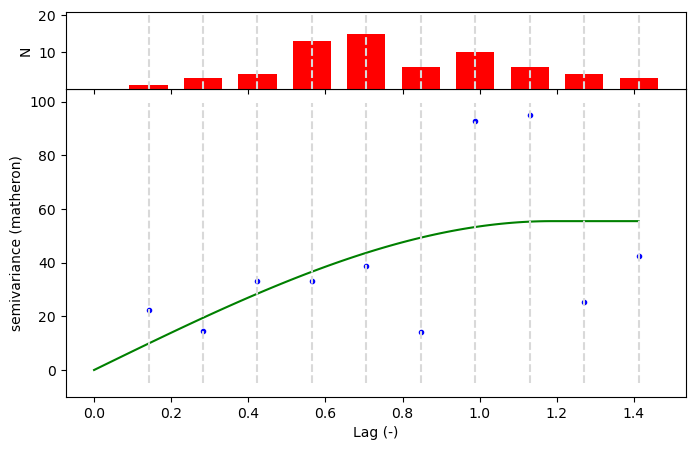

In [165]:
from skgstat import Variogram
import matplotlib.pyplot as plt


for _, row in pm10_df.iterrows():
    row.name = "contamination"
    data = gdf_podkarpacie_cities.join(row, on='STATION_NA')
    
    coordinates = data['geometry'].apply(lambda p: (p.x, p.y)).tolist()
    values = list(map(float, data['contamination'].tolist()))

    V = Variogram(coordinates, values, model='spherical', maxlag=20, n_lags=10)

    fig = V.plot()
    plt.show()
    break

In [195]:
def interpolate(V, ax, max_x, max_y, min_x, min_y):
    xx, yy = np.mgrid[min_x:max_x:100j, min_y:max_y:100j]
    ok = skg.OrdinaryKriging(V, min_points=5, max_points=15, mode='exact')
    field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
    art = ax.matshow(field, origin='lower', cmap='plasma', vmin=V.values.min(), vmax=V.values.max())
    ax.set_title('%s model' % V.model.__name__)
    plt.colorbar(art, ax=ax)
    return field

In [196]:
max_x = max(point.x for point in gdf_podkarpacie_cities['geometry']) + .5
max_y = max(point.y for point in gdf_podkarpacie_cities['geometry']) + .5
min_x = min(point.x for point in gdf_podkarpacie_cities['geometry']) - .5
min_y = min(point.y for point in gdf_podkarpacie_cities['geometry']) - .5

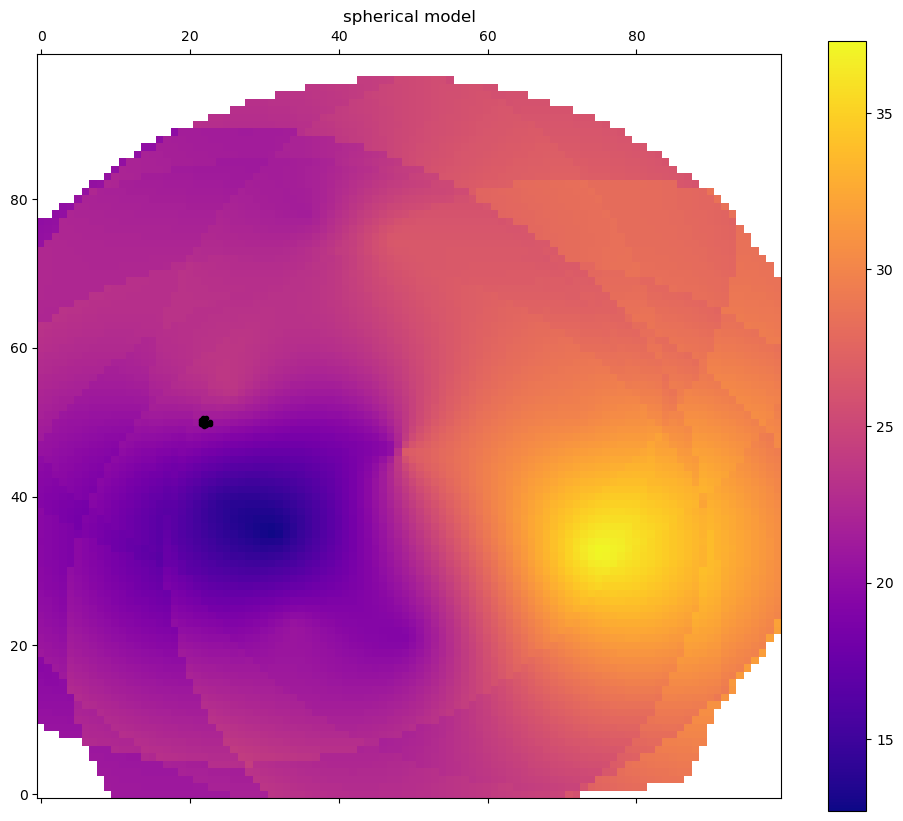

In [197]:
fields = []
fig, _a = plt.subplots(1,1, figsize=(12, 10), sharex=True, sharey=True)
axes = _a
fields.append(interpolate(V, axes, max_x, max_y, min_x, min_y))
axes.plot(gdf_podkarpacie_cities['geometry'].x, gdf_podkarpacie_cities['geometry'].y, 'k.')